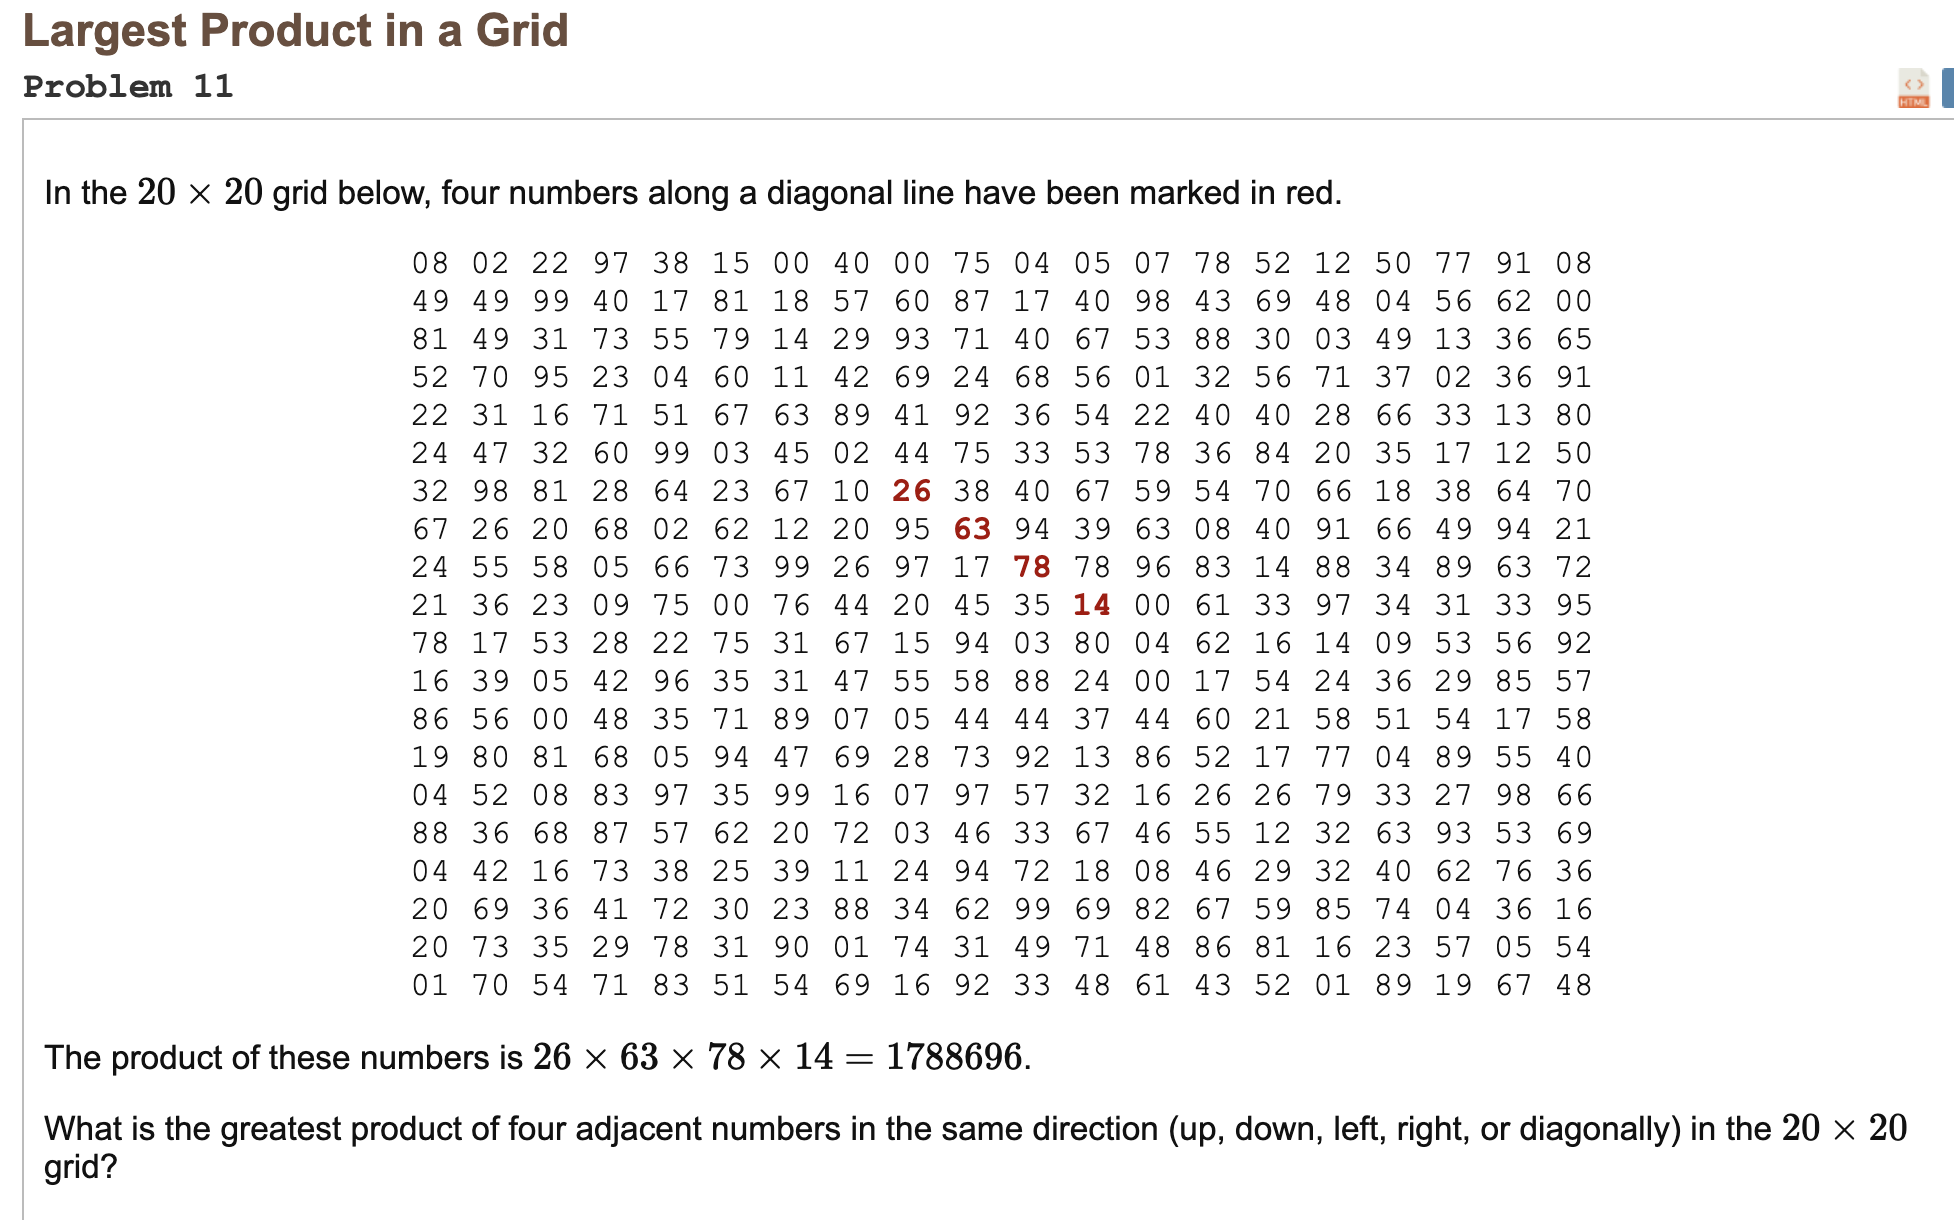

## Initial approach

We need to perform 4 different searches here: 

* From bottom to top
* From right to left
* Diagonally from left to right
* Diagonally from right to left

Let’s write a separate function for each of them.

In [1]:
main_table = """
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
"""

### From bottom to top

In [2]:
def get_bottom_to_top_combinations(grid):
    rows = len(grid)
    cols = len(grid[0])
    combinations = []
    for col in range(cols):
        for row in range(3, rows):
            group = [grid[row - i][col] for i in range(4)]
            combinations.append(group)
    return combinations

In [3]:
grid = [
    [int(n) for n in line.split()]
    for line in main_table.strip().split("\n")
]

bottom_to_top = get_bottom_to_top_combinations(grid)
print(bottom_to_top[:10])

[[52, 81, 49, 8], [22, 52, 81, 49], [24, 22, 52, 81], [32, 24, 22, 52], [67, 32, 24, 22], [24, 67, 32, 24], [21, 24, 67, 32], [78, 21, 24, 67], [16, 78, 21, 24], [86, 16, 78, 21]]


### From right to left 

In [4]:
def get_left_to_right_combinations(grid):
    rows = len(grid)
    cols = len(grid[0])
    combinations = []
    for row in range(rows):
        for col in range(cols - 3):
            group = [grid[row][col + i] for i in range(4)]
            combinations.append(group)
    return combinations

In [5]:
left_to_right = get_left_to_right_combinations(grid)
print(left_to_right[:10])

[[8, 2, 22, 97], [2, 22, 97, 38], [22, 97, 38, 15], [97, 38, 15, 0], [38, 15, 0, 40], [15, 0, 40, 0], [0, 40, 0, 75], [40, 0, 75, 4], [0, 75, 4, 5], [75, 4, 5, 7]]


### Diagonally from left to right

In [6]:
def get_diagonal_left_to_right_combinations(grid):
    rows = len(grid)
    cols = len(grid[0])
    combinations = []
    for row in range(rows - 3):
        for col in range(cols - 3):
            group = [grid[row + i][col + i] for i in range(4)]
            combinations.append(group)
    return combinations

In [7]:
diagonal_lr = get_diagonal_left_to_right_combinations(grid)
print(diagonal_lr[:10])

[[8, 49, 31, 23], [2, 99, 73, 4], [22, 40, 55, 60], [97, 17, 79, 11], [38, 81, 14, 42], [15, 18, 29, 69], [0, 57, 93, 24], [40, 60, 71, 68], [0, 87, 40, 56], [75, 17, 67, 1]]


### Diagonally from right to left

In [8]:
def get_diagonal_right_to_left_combinations(grid):
    rows = len(grid)
    cols = len(grid[0])
    combinations = []
    for row in range(rows - 3):
        for col in range(3, cols):
            group = [grid[row + i][col - i] for i in range(4)]
            combinations.append(group)
    return combinations

In [9]:
diagonal_rl = get_diagonal_right_to_left_combinations(grid)
print(diagonal_rl[:10])

[[97, 99, 49, 52], [38, 40, 31, 70], [15, 17, 73, 95], [0, 81, 55, 23], [40, 18, 79, 4], [0, 57, 14, 60], [75, 60, 29, 11], [4, 87, 93, 42], [5, 17, 71, 69], [7, 40, 40, 24]]


In [10]:
all_combinations = (
    get_bottom_to_top_combinations(grid) +
    get_left_to_right_combinations(grid) +
    get_diagonal_left_to_right_combinations(grid) +
    get_diagonal_right_to_left_combinations(grid)
)

products = []
for group in all_combinations:
    product = 1
    for num in group:
        product *= num
    products.append(product)

max_product = max(products)

print(max_product)

70600674


### Calculate time

In [11]:
%%time

grid = [
    [int(n) for n in line.split()]
    for line in main_table.strip().split("\n")
]

bottom_to_top = get_bottom_to_top_combinations(grid)
left_to_right = get_left_to_right_combinations(grid)
diagonal_lr = get_diagonal_left_to_right_combinations(grid)
diagonal_rl = get_diagonal_right_to_left_combinations(grid)

all_combinations = (
    get_bottom_to_top_combinations(grid) +
    get_left_to_right_combinations(grid) +
    get_diagonal_left_to_right_combinations(grid) +
    get_diagonal_right_to_left_combinations(grid)
)

products = []
for group in all_combinations:
    product = 1
    for num in group:
        product *= num
    products.append(product)

max_product = max(products)

print(f"Result: {max_product}")

Result: 70600674
CPU times: user 866 μs, sys: 9 μs, total: 875 μs
Wall time: 877 μs


## Initial approach is clean, simple, and efficient enough for the given input size.